# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# 1) Data understanding

## Importing data

In [2]:
df = pd.read_csv('Downloads/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Dropping non-essential columns
df = df.drop({'instant','dteday','atemp','casual','registered'}, axis=1)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,48.3333,23.500518,1796


## Data Visualisation

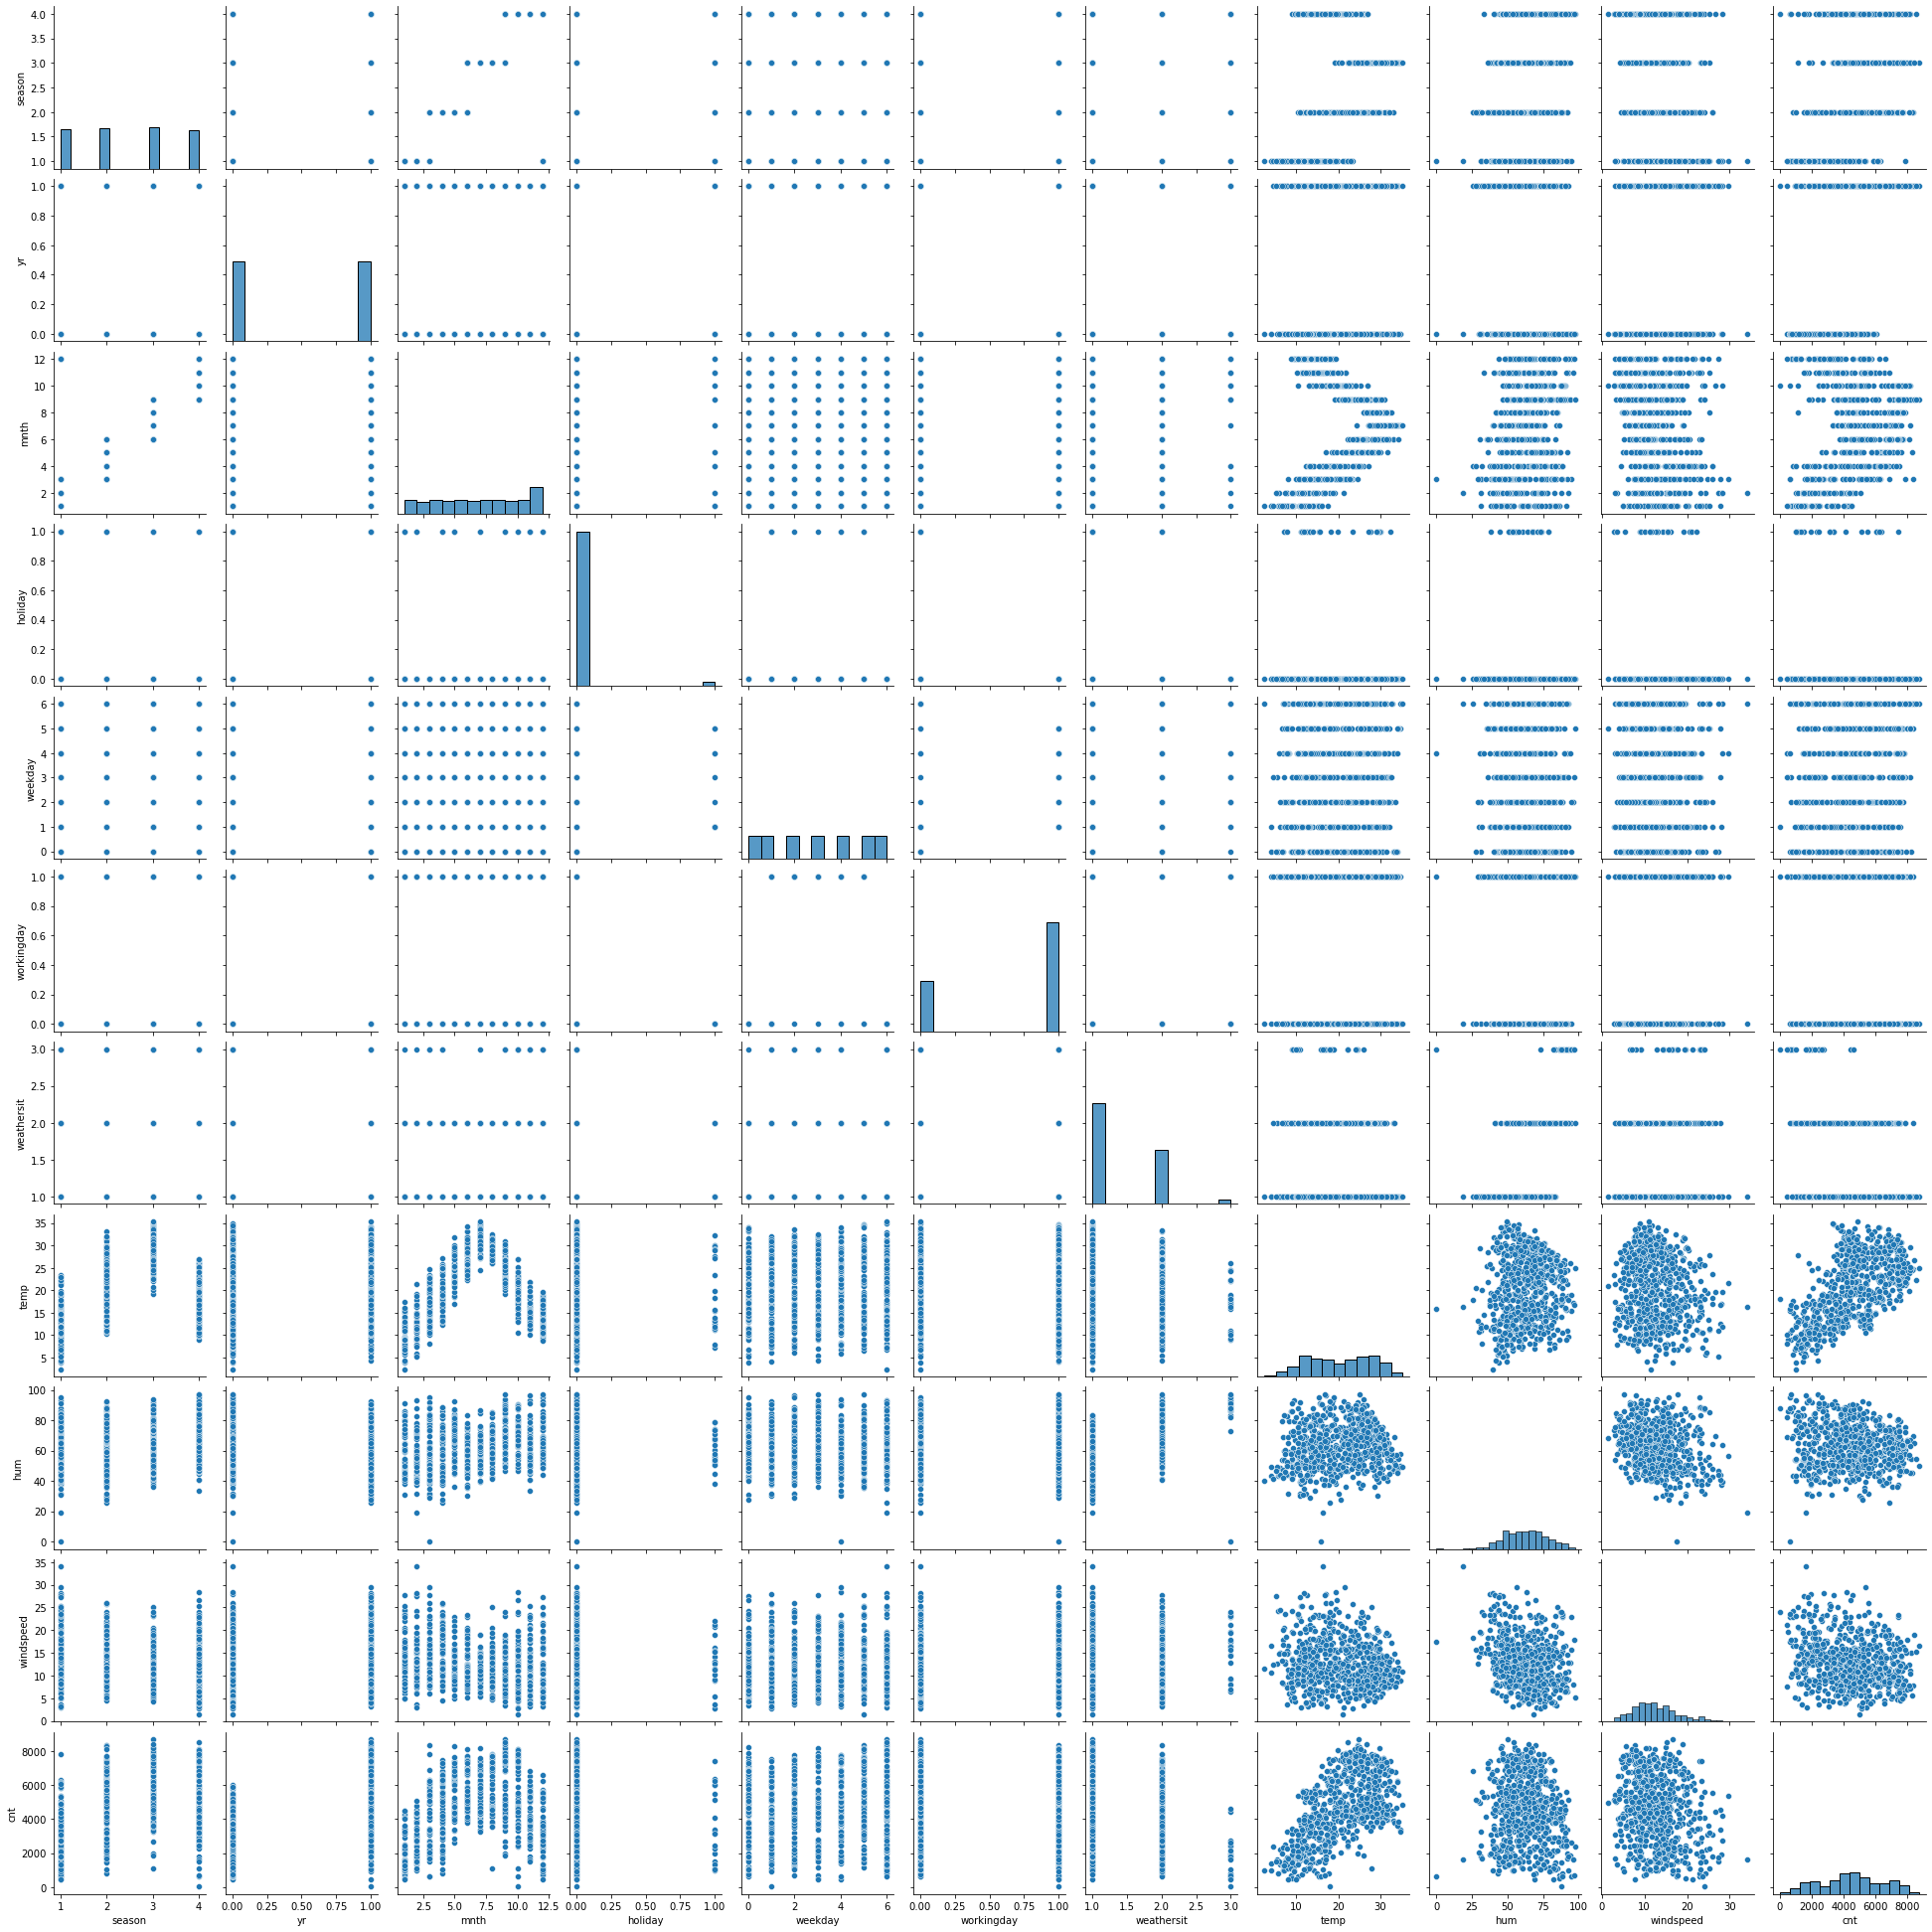

In [6]:
#visualising all variables
sns.pairplot(df)
plt.show()

In [7]:
#decoding variables for data visulisation and interpretability
df[['season']] = df[['season']].apply(lambda x: x.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'}))
#decoding year variable
df[['yr']] = df[['yr']].apply(lambda x: x.map({0:'2018',1:'2019'}))
#decoding binary variables
df[['holiday','workingday']] = df[['holiday','workingday']].apply(lambda x: x.map({1:'yes',0:'no'}))
#decoding weekday
df[['weekday']] = df[['weekday']].apply(lambda x: x.map({0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}))
#decoding month variable
df[['mnth']] = df[['mnth']].apply(lambda x: x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}))
#decoding weathersit variable
df[['weathersit']] = df[['weathersit']].apply(lambda x: x.map({1:'Clear',2:'Cloudy',3:'LightRainSnow',4:'HeavyRainSnow'}))
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,2018,Jan,no,Sun,no,Cloudy,14.110847,80.5833,10.749882,985
1,Spring,2018,Jan,no,Mon,no,Cloudy,14.902598,69.6087,16.652113,801
2,Spring,2018,Jan,no,Tue,yes,Clear,8.050924,43.7273,16.636703,1349
3,Spring,2018,Jan,no,Wed,yes,Clear,8.200000,59.0435,10.739832,1562
4,Spring,2018,Jan,no,Thur,yes,Clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,2019,Dec,no,Fri,yes,Cloudy,10.420847,65.2917,23.458911,2114
726,Spring,2019,Dec,no,Sat,yes,Cloudy,10.386653,59.0000,10.416557,3095
727,Spring,2019,Dec,no,Sun,no,Cloudy,10.386653,75.2917,8.333661,1341
728,Spring,2019,Dec,no,Mon,no,Clear,10.489153,48.3333,23.500518,1796


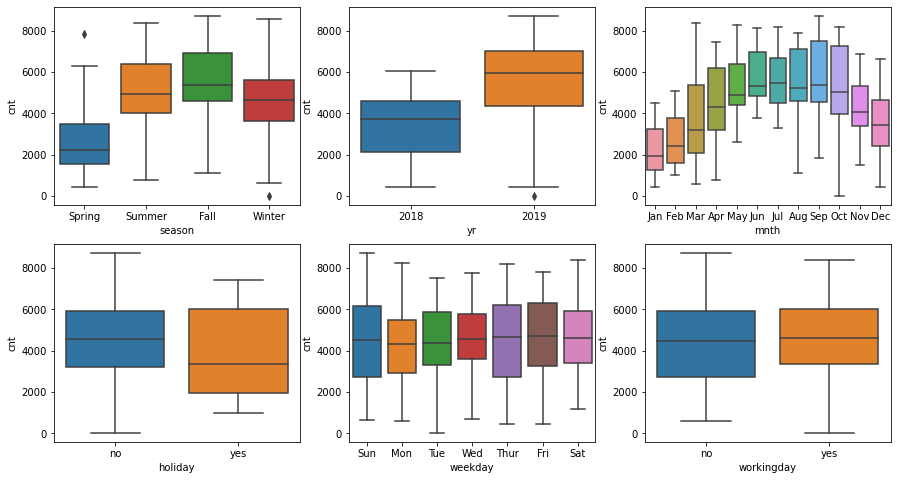

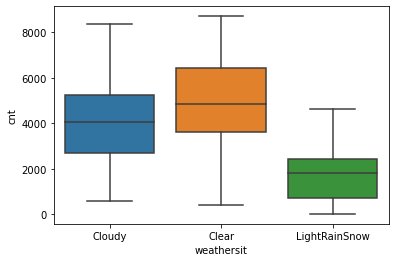

In [8]:
#visualizing categorical variables
plt.figure(figsize = (15,8))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

### Processing categorical variables

In [9]:
#converting dummy variables
var = ['season','yr','mnth','weekday','weathersit']
status = pd.get_dummies(df[var], drop_first=True)
status

,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_LightRainSnow
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
726,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
727,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [10]:
#converting binary variables
df[['holiday','workingday']] = df[['holiday','workingday']].apply(lambda x: x.map({'yes':1,'no':0}))
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,2018,Jan,0,Sun,0,Cloudy,14.110847,80.5833,10.749882,985
1,Spring,2018,Jan,0,Mon,0,Cloudy,14.902598,69.6087,16.652113,801
2,Spring,2018,Jan,0,Tue,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,2018,Jan,0,Wed,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,2018,Jan,0,Thur,1,Clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,2019,Dec,0,Fri,1,Cloudy,10.420847,65.2917,23.458911,2114
726,Spring,2019,Dec,0,Sat,1,Cloudy,10.386653,59.0000,10.416557,3095
727,Spring,2019,Dec,0,Sun,0,Cloudy,10.386653,75.2917,8.333661,1341
728,Spring,2019,Dec,0,Mon,0,Clear,10.489153,48.3333,23.500518,1796


In [11]:
#concatenating status and df
df = pd.concat([df,status],axis=1)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_LightRainSnow
0,Spring,2018,Jan,0,Sun,0,Cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,1,0,0,0,1,0
1,Spring,2018,Jan,0,Mon,0,Cloudy,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,1,0
2,Spring,2018,Jan,0,Tue,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,1,0,0,0
3,Spring,2018,Jan,0,Wed,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,Spring,2018,Jan,0,Thur,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,2019,Dec,0,Fri,1,Cloudy,10.420847,65.2917,23.458911,...,0,0,0,0,0,0,0,0,1,0
726,Spring,2019,Dec,0,Sat,1,Cloudy,10.386653,59.0000,10.416557,...,0,0,0,1,0,0,0,0,1,0
727,Spring,2019,Dec,0,Sun,0,Cloudy,10.386653,75.2917,8.333661,...,0,0,0,0,1,0,0,0,1,0
728,Spring,2019,Dec,0,Mon,0,Clear,10.489153,48.3333,23.500518,...,0,0,1,0,0,0,0,0,0,0


In [12]:
#dropping unnecessary variables
df = df.drop(['season','yr','mnth','weekday','weathersit'], axis=1)
df

,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_LightRainSnow
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,10.420847,65.2917,23.458911,2114,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
726,0,1,10.386653,59.0000,10.416557,3095,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
727,0,0,10.386653,75.2917,8.333661,1341,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
728,0,0,10.489153,48.3333,23.500518,1796,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


# 2) Model Building

In [13]:
#Splitting the data into train and test
df_train, df_test = train_test_split(df, train_size=0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [14]:
# Scaling numeric variables

#indentifying numeric variables
num_var = ['temp','hum','windspeed','cnt']

#scaler
scaler = MinMaxScaler()

#fit the data
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train

,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_LightRainSnow
576,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
426,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
728,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
482,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
111,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,1,0.863973,0.679690,0.187140,0.832835,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
53,0,1,0.202618,0.435939,0.111379,0.218017,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0.312586,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
79,0,1,0.462664,0.759870,0.529881,0.236424,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


## Training the data

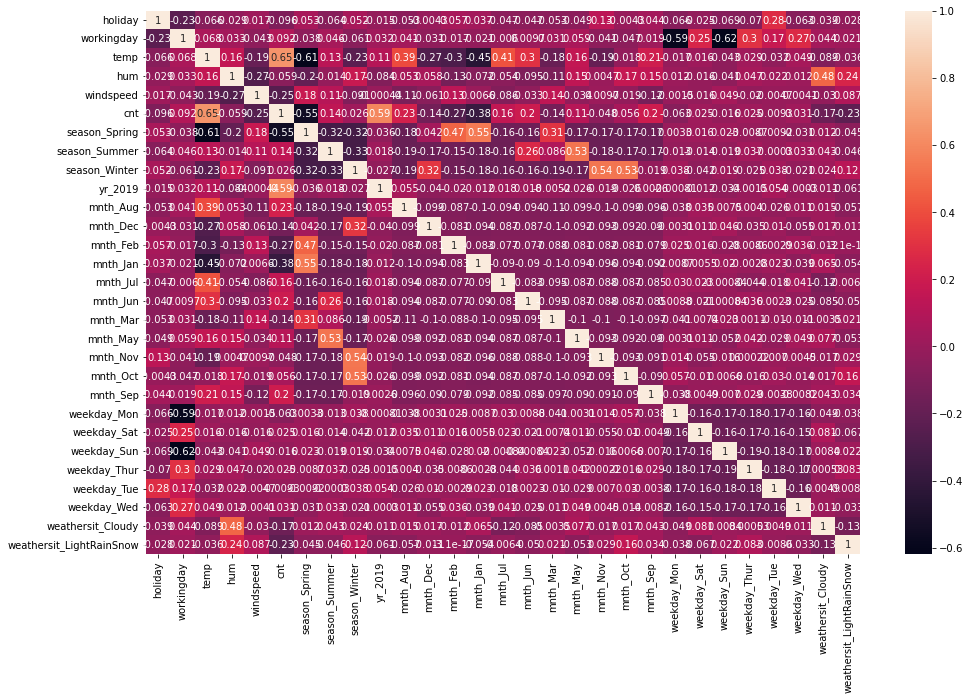

In [15]:
#check heatmap

plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr() , annot = True)
plt.show()

## Feature Selection

In [16]:
#Assigning dependent and independent variables
y_train = df_train.pop('cnt')
X_train = df_train
print(y_train)
print(X_train)

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64
     holiday  workingday      temp       hum  windspeed  season_Spring  \
576        0           1  0.815169  0.725633   0.264686              0   
426        0           0  0.442393  0.640189   0.255342              1   
728        0           0  0.245101  0.498067   0.663106              1   
482        0           0  0.395666  0.504508   0.188475              0   
111        0           1  0.345824  0.751824   0.380981              0   
..       ...         ...       ...       ...        ...            ...   
578        0           1  0.863973  0.679690   0.187140              0   
53         0           1  0.202618  0.435939   0.111379              1   
350        0           0  0.248216  0.577930   0.431816              0   
79         0           1  0.462664  0.759870 

In [17]:
#Checking VIF
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
1,workingday,86.40
22,weekday_Sun,19.71
20,weekday_Mon,18.34
5,season_Spring,10.75
7,season_Winter,9.44
6,season_Summer,8.27
2,temp,7.08
17,mnth_Nov,6.79
18,mnth_Oct,6.47
9,mnth_Aug,6.36


## Recursive Feature Elimination

In [18]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(estimator=lm , n_features_to_select = 15)
rfe = rfe.fit(X_train,y_train)

In [19]:
list(zip(X_train.columns, rfe.support_ , rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 5),
 ('weekday_Sat', False, 10),
 ('weekday_Sun', True, 1),
 ('weekday_Thur', False, 13),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 9),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_LightRainSnow', True, 1)]

In [20]:
col = X_train.columns[rfe.support_]
col


Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'yr_2019', 'mnth_Jan', 'mnth_Jul',
       'mnth_Sep', 'weekday_Sun', 'weathersit_Cloudy',
       'weathersit_LightRainSnow'],
      dtype='object')

In [21]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [22]:
#Creating X_train dataframe with RFE support variables
X_train_rfe = X_train[col]

In [23]:
#Adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [24]:
#Fit the data
lm = sm.OLS(y_train,X_train_rfe).fit()

In [25]:
#Summary of linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          4.22e-191
Time:                        19:29:24   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2519      0.036      6.969      0.000       0.181       0.323
holiday                     -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday                   0.0433      0.012      3.762      0.000       0.021       0.066
temp                         0.5096      0.034     14.837      0.000       0.442       0.577
hum                         -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                   -0.1863      0.025     -7.310      0.000      -0.236      -0.136
season_Spring               -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_Summer                0.0508      0.015      3.423      0.001       0.022       0.080
season_Winter                0.0933      0.017      5.403      0.000       0.059       0.127
yr_2019                      0.2305      0.008     28.795      0.000       0.215       0.246
mnth_Jan                    -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_Jul                    -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_Sep                     0.0814      0.016      4.945      0.000       0.049       0.114
weekday_Sun                  0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_Cloudy           -0.0563      0.010     -5.439      0.000      -0.077      -0.036
weathersit_LightRainSnow    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3) Residual Analysis

In [26]:
#checking residuals
y_train_pred = lm.predict(X_train_rfe)
res = y_train - y_train_pred

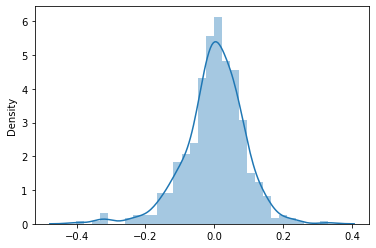

In [27]:
#visualising error terms
sns.distplot(res)
plt.show()

In [28]:
#since error terms are normally distributed, model is reliable
print('Model is reliable')

Model is reliable


# 4) Testing the model

In [29]:
#perform preprocessing operations such as scaling
# Scaling numeric variables

#indentifying numeric variables
num_var = ['temp','hum','windspeed','cnt']

#fit the data
df_test[num_var] = scaler.transform(df_test[num_var])
df_test

,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_LightRainSnow
184,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
535,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
221,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0,1,0.519232,0.756118,0.283397,0.757478,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
127,0,0,0.584649,0.650923,0.069510,0.495973,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
640,0,1,0.745598,0.817947,0.052115,0.868615,0,0,1,1,...,1,0,0,0,0,1,0,0,1,0
72,0,1,0.331557,0.512107,0.203418,0.232858,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
#assigning dependent and independent variables
y_test = df_test.pop('cnt')
X_test = df_test
print(y_test)
print(X_test)

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
702    0.757478
127    0.495973
640    0.868615
72     0.232858
653    0.864243
Name: cnt, Length: 220, dtype: float64
     holiday  workingday      temp       hum  windspeed  season_Spring  \
184        1           0  0.831783  0.657364   0.084219              0   
535        0           1  0.901354  0.610133   0.153728              0   
299        0           1  0.511964  0.837699   0.334206              0   
221        0           1  0.881625  0.437098   0.339570              0   
152        0           1  0.817246  0.314298   0.537414              0   
..       ...         ...       ...       ...        ...            ...   
702        0           1  0.519232  0.756118   0.283397              0   
127        0           0  0.584649  0.650923   0.069510              0   
640        0           1  0.745598  0.817947   0.052115              0   
72         0           1  0.331557  0.512107 

In [31]:
X_test_sm = X_test[col]
#Adding constant variable
X_test_sm = sm.add_constant(X_test_sm)

In [32]:
#Predict
y_test_pred = lm.predict(X_test_sm)

In [33]:
#Evaluate r2_score
r2_score = r2_score(y_true=y_test, y_pred=y_test_pred)
print('The R-square for the model is ',round(r2_score,3))

The R-square for the model is  0.815
